In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
application = pd.read_csv("application_data.csv")
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
import warnings   
warnings.filterwarnings("ignore")

In [3]:
application.info("all")
pd.set_option('display.max_rows', None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

# Step 2: Data Cleaning and Manipulation


## 2.1 checking null values


In [4]:
def check_null_values(df):
  return  round((df.isnull().sum()*100/len(df)).sort_values(ascending=False),2)



In [5]:
check_null_values(application)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [6]:
application.shape

(307511, 122)

#### 2.1.1 number of colums which have more than 50% of data missing

In [7]:
Null_columns_50 = check_null_values(application)[check_null_values(application)>50]
Null_columns_50

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAPARTMENTS_MEDI    69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_MODE       68.35
LIVINGAPARTMENTS_AVG        68.35
LIVINGAPARTMENTS_MEDI       68.35
FLOORSMIN_AVG               67.85
FLOORSMIN_MODE              67.85
FLOORSMIN_MEDI              67.85
YEARS_BUILD_MEDI            66.50
YEARS_BUILD_MODE            66.50
YEARS_BUILD_AVG             66.50
OWN_CAR_AGE                 65.99
LANDAREA_MEDI               59.38
LANDAREA_MODE               59.38
LANDAREA_AVG                59.38
BASEMENTAREA_MEDI           58.52
BASEMENTAREA_AVG            58.52
BASEMENTAREA_MODE           58.52
EXT_SOURCE_1                56.38
NONLIVINGAREA_MODE          55.18
NONLIVINGAREA_AVG           55.18
NONLIVINGAREA_MEDI          55.18
ELEVATORS_MEDI              53.30
ELEVATORS_AVG               53.30
ELEVATORS_MODE

#### drop columns have missing value greater than 50%

In [8]:
Null_columns_50.index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE'],
      dtype='object')

In [9]:
application.drop(columns = Null_columns_50.index, inplace = True)

In [10]:
application.shape  # now we have 81 columns

(307511, 81)

### 2.1.2 Dealing with null values more than 15%

In [11]:
null_col_15 = check_null_values(application)[check_null_values(application)>15]

In [12]:
null_col_15

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
dtype: float64

#### occupation and EXT_SOURCE_3 seems important so, dropping columns except these

In [13]:
null_col_15.drop(["OCCUPATION_TYPE","EXT_SOURCE_3"],inplace = True)
null_col_15

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
dtype: float64

In [14]:
#remove columns having more than 15%  missing values
application.drop(null_col_15.index, axis = 1, inplace = True)



In [15]:
application.shape 

(307511, 73)

<AxesSubplot:>

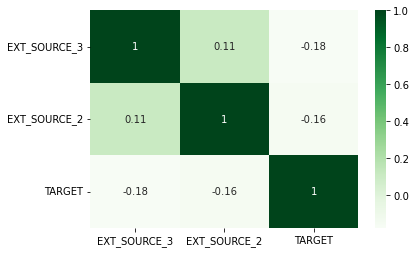

In [16]:
#checking how EXT_SOURCE_3,2 related to the target variable
import seaborn as sns
sns.heatmap(application[["EXT_SOURCE_3","EXT_SOURCE_2","TARGET"]].corr(),cmap="Greens",annot=True)


#### * dropping columns EXT_SOURCE_2 and 3 because of no linear correlation with the target variable


In [17]:
application.drop(["EXT_SOURCE_3","EXT_SOURCE_2"],axis=1,inplace=True)


In [18]:
application.shape

(307511, 71)


### Analysing flag_columns


In [19]:
column_with_flag = [ cols for cols in application.columns if "FLAG" in cols]
column_with_flag

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [20]:
flag_dataframe = application[column_with_flag+["TARGET"]]
flag_dataframe.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


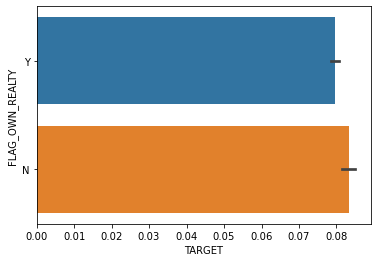

In [21]:
import seaborn as sns

ax = sns.barplot(y="FLAG_OWN_REALTY", x="TARGET", data=flag_dataframe)

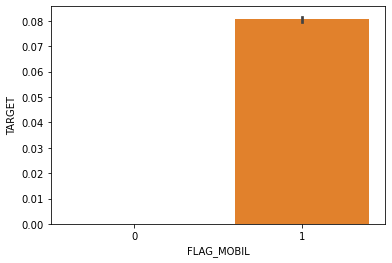

In [22]:
import seaborn as sns

ax = sns.barplot(x="FLAG_MOBIL", y="TARGET", data=flag_dataframe)

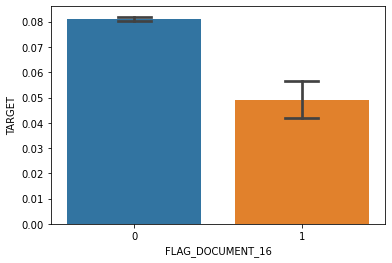

In [23]:
import seaborn as sns
import numpy 
ax = sns.barplot(x="FLAG_DOCUMENT_16", y="TARGET", data=flag_dataframe, capsize=.2)

### 3 . Imputation


In [24]:
check_null_values(application)

OCCUPATION_TYPE                31.35
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
AMT_GOODS_PRICE                 0.09
AMT_ANNUITY                     0.00
CNT_FAM_MEMBERS                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_7                 0.00
FLAG_DOCUMENT_12                0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
FLAG_DOCUMENT_11                0.00
L

### Imputation on "OCCUPATION_TYPE" column

In [25]:
application["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

 analysis: this is a categorical column with more than 31.35% missing values


In [26]:
#imputing null_values with "Unknown"
application["OCCUPATION_TYPE"] = application["OCCUPATION_TYPE"].fillna("Unknown")

In [27]:
application["OCCUPATION_TYPE"].isnull().sum()

0

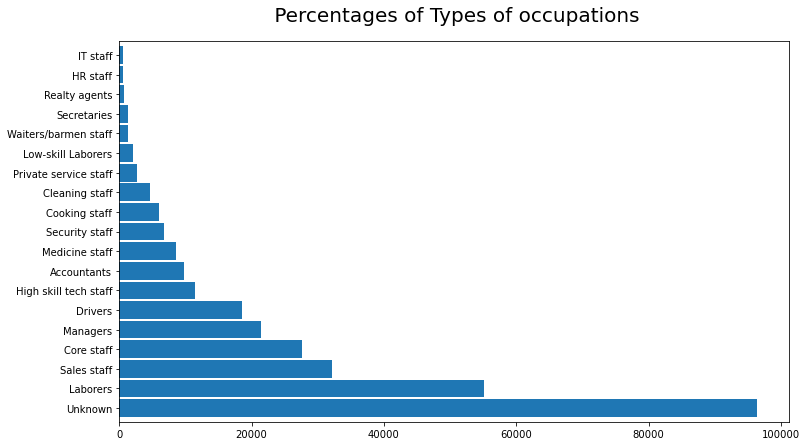

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=[12,7])
application["OCCUPATION_TYPE"].value_counts().plot.barh(width = 0.9)
plt.title(" Percentages of Types of occupations",fontdict={"fontsize":20},pad = 20)
plt.show()

In [29]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### for columns -"AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"  numerical values imputing median


In [30]:
amount_credit = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

In [31]:
application.fillna(application[amount_credit].median(),inplace = True)

In [32]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Standardising values

Insights:

from above describe result we can see that

columns AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE have very high values, thus will make these numerical columns in categorical columns for better understanding.
columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE which counts days have negative values. thus will correct those values
convert DAYS_BIRTH to AGE in years , DAYS_EMPLOYED to YEARS EMPLOYED

In [33]:
#binning numerical colums to categorical columns

application['AMT_INCOME_TOTAL']= application['AMT_INCOME_TOTAL']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot_lakhs = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

application['AMT_INCOME_RANGE']=pd.cut(application['AMT_INCOME_TOTAL'],bins,labels=slot_lakhs)

In [34]:
round((application["AMT_INCOME_RANGE"].value_counts(normalize=True)*100),2)

1L-2L        50.73
2L-3L        21.21
0-1L         20.73
3L-4L         4.78
4L-5L         1.74
5L-6L         0.36
6L-7L         0.28
8L-9L         0.10
7L-8L         0.05
9L-10L        0.01
10L Above     0.01
Name: AMT_INCOME_RANGE, dtype: float64

In [35]:
#BINNING CREDIT AMOUNT IN LAKHS
application["AMT_CREDIT"]= application["AMT_CREDIT"]/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots_lakhs = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

application['AMT_CREDIT_RANGE']=pd.cut(application['AMT_CREDIT'],bins=bins,labels=slots_lakhs)

In [36]:
round((application["AMT_CREDIT_RANGE"].value_counts(normalize = True)*100),2)

2L-3L        17.82
10L Above    16.25
5L-6L        11.13
4L-5L        10.42
1L-2L         9.80
3L-4L         8.56
6L-7L         7.82
8L-9L         7.09
7L-8L         6.24
9L-10L        2.90
0-1L          1.95
Name: AMT_CREDIT_RANGE, dtype: float64

In [37]:
application["AMT_GOODS_PRICE"] = application["AMT_GOODS_PRICE"]/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots_lakhs = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

application['AMT_GOODS_PRICE_RANGE']=pd.cut(application['AMT_GOODS_PRICE'],bins=bins,labels=slots_lakhs)

In [38]:
round((application["AMT_GOODS_PRICE_RANGE"].value_counts(normalize = True)*100),2)

2L-3L        20.43
4L-5L        18.54
6L-7L        13.03
10L Above    11.11
1L-2L        10.73
8L-9L         6.99
3L-4L         6.91
5L-6L         4.27
0-1L          2.83
7L-8L         2.64
9L-10L        2.53
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

####Dealing with DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE

In [39]:
days_column = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]

In [40]:
application[days_column].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373,-962.858788
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


In [41]:
#days can't be negative, so using absolute functions
application[days_column]= abs(application[days_column])

In [42]:
application[days_column].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


In [43]:
 # converting DAYS_BIRTH, DAYS_EMPLOYED columns in terms of Years and binning years for better understanding, that is adding two more categorical column
    
application["AGE"]= application["DAYS_BIRTH"]/365
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

application["AGE_GROUP"] = pd.cut(application["AGE"], bins=bins, labels=slots)

In [44]:
application["AGE_GROUP"].value_counts(normalize = True)*100

35-40       13.940314
40-45       13.464884
30-35       12.825557
60 Above    11.569993
45-50       11.425608
50-55       11.362846
55-60       10.770346
25-30       10.686447
20-25        3.954005
0-20         0.000000
Name: AGE_GROUP, dtype: float64

In [45]:
#creating column EMPLOYMENT_YEARS from "DAYS_EMPLOYED"

application["YEARS_EMPLOYED"] = application["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]
application["EMPLOYMENT_YEARS"] = pd.cut(application["YEARS_EMPLOYED"],bins = bins, labels = slots)

In [46]:
application["EMPLOYMENT_YEARS"].value_counts(normalize=True)*100

0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
30 Above     1.191822
Name: EMPLOYMENT_YEARS, dtype: float64

# outliers


In [47]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979,5.990260,27108.573909,5.383962,0.020868,16036.995067,67724.742149,...,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,43.936973,185.547239
std,102790.175348,0.272419,0.722121,2.371231,4.024908,14493.737315,3.694465,0.013831,4363.988632,139443.751806,...,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,11.956133,382.037676
min,100002.000000,0.000000,0.000000,0.256500,0.450000,1615.500000,0.405000,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.000000
25%,189145.500000,0.000000,0.000000,1.125000,2.700000,16524.000000,2.385000,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.008219,2.556164
50%,278202.000000,0.000000,0.000000,1.471500,5.135310,24903.000000,4.500000,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.150685,6.079452
75%,367142.500000,0.000000,1.000000,2.025000,8.086500,34596.000000,6.795000,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.923288,15.635616
max,456255.000000,1.000000,19.000000,1170.000000,40.500000,258025.500000,40.500000,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.120548,1000.665753


In [48]:
#if difference in mean and 50% is too high then we can say the column as outliers

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

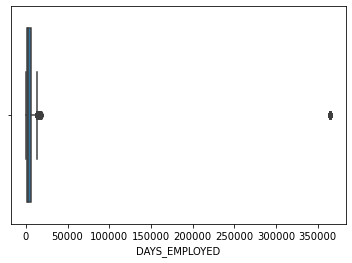

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(application.DAYS_EMPLOYED)   ## how can DAYS_EMPLOED and DAYS_BIRTH have negative values

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

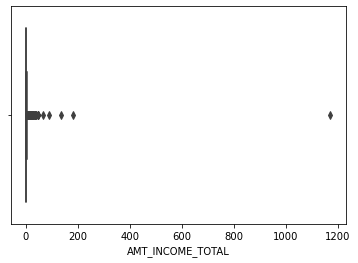

In [50]:
sns.boxplot(application.AMT_INCOME_TOTAL)

<AxesSubplot:xlabel='AMT_CREDIT'>

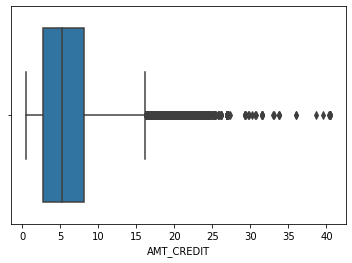

In [51]:
sns.boxplot(application.AMT_CREDIT)

<AxesSubplot:xlabel='AMT_ANNUITY'>

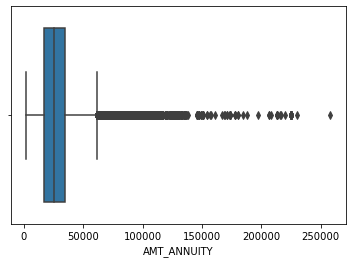

In [52]:
sns.boxplot(application.AMT_ANNUITY)


<AxesSubplot:xlabel='CNT_CHILDREN'>

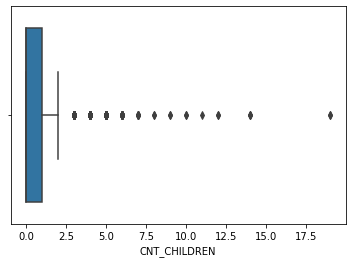

In [53]:
sns.boxplot(application.CNT_CHILDREN)

<AxesSubplot:xlabel='YEARS_EMPLOYED'>

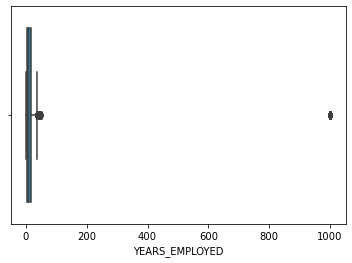

In [54]:
sns.boxplot(application.YEARS_EMPLOYED)


### INSIGHTS FROM application data

* AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.
*AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.
*DAYS_BIRTH has no outliers which means the data available is reliable.
*DAYS_EMPLOYED hasmean of 185 and median of 6 which is impossible and proves that it has incorrect data


In [55]:
application.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_7                     2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_11                    2
FLAG_MOBIL                          2
FLAG_DOCUMENT_13                    2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
FLAG_DOCUMEN

In [56]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 78 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [57]:
application_categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']

for col in application_categorical_columns:
    application[col] = pd.Categorical(application[col])

In [58]:
application.describe()


,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
count,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,1.687979,5.990260,27108.573909,5.383962,0.020868,16036.995067,67724.742149,4986.120328,...,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,43.936973,185.547239
std,102790.175348,0.272419,2.371231,4.024908,14493.737315,3.694465,0.013831,4363.988632,139443.751806,3522.886321,...,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,11.956133,382.037676
min,100002.000000,0.000000,0.256500,0.450000,1615.500000,0.405000,0.000290,7489.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.000000
25%,189145.500000,0.000000,1.125000,2.700000,16524.000000,2.385000,0.010006,12413.000000,933.000000,2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.008219,2.556164
50%,278202.000000,0.000000,1.471500,5.135310,24903.000000,4.500000,0.018850,15750.000000,2219.000000,4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.150685,6.079452
75%,367142.500000,0.000000,2.025000,8.086500,34596.000000,6.795000,0.028663,19682.000000,5707.000000,7479.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.923288,15.635616
max,456255.000000,1.000000,1170.000000,40.500000,258025.500000,40.500000,0.072508,25229.000000,365243.000000,24672.000000,...,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.120548,1000.665753


## DATASET 2: "previous_application.csv"

In [59]:
import pandas as pd
previous = pd.read_csv("previous_application.csv")

In [60]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
previous.shape

(1670214, 37)

In [62]:
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [63]:
previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Analysis 
 1. There are 37 columns and 1670214 rows
 2. Days can't be negative, need to fix that
 

In [64]:

check_null_values(previous)


RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

In [65]:
previous_null_col_50 = check_null_values(previous)[check_null_values(previous)>50]

In [66]:
previous_null_col_50

RATE_INTEREST_PRIVILEGED    99.64
RATE_INTEREST_PRIMARY       99.64
AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
dtype: float64

In [67]:
previous.drop(columns = previous_null_col_50.index,inplace=True)

In [68]:
previous_null_col_15 = check_null_values(previous)[check_null_values(previous)>15]

In [69]:
previous_null_col_15

NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
NFLAG_INSURED_ON_APPROVAL    40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

In [70]:
previous[previous_null_col_15.index].head()

,NAME_TYPE_SUITE,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
0,NaN,365243.0,-37.0,-42.0,300.0,-42.0,0.0,17145.0,1730.430,12.0
1,Unaccompanied,365243.0,365243.0,365243.0,916.0,-134.0,1.0,607500.0,25188.615,36.0
2,"Spouse, partner",365243.0,365243.0,365243.0,59.0,-271.0,1.0,112500.0,15060.735,12.0
3,NaN,365243.0,-177.0,-182.0,-152.0,-482.0,1.0,450000.0,47041.335,12.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,337500.0,31924.395,24.0


In [71]:
previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [72]:
#unnecessary columns
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

previous.drop(Unnecessary_previous,axis =1, inplace = True)

previous.shape

(1670214, 29)

In [73]:
# IMputing values "Unknown" as this a categorical column
previous["NAME_TYPE_SUITE"] = previous["NAME_TYPE_SUITE"].fillna("Unknown")

check_null_values(previous)

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
NAME_PRODUCT_TYPE             0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
CHANNEL_TYPE                  0.00
SK_ID_PREV                    0.00
NAME_PORTFOLIO                0.00
SK_ID_CURR                    0.00
NAME_CLIENT_TYPE              0.00
NAME_TYPE_SUITE               0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE            0.00
NAME_GOODS_CATEGORY 

## IMPUTATION

In [74]:
#There are missing values in columns 'DAYS_FIRST_DUE', 'DAYS_TERMINATION', 'DAYS_FIRST_DRAWING','DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', as these columns count days we need to keep the null values as they are
previous[previous_null_col_15.index].describe()


,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297979e+06,1.297984e+06
mean,342209.855039,81992.343838,76582.403064,33767.774054,13826.269337,0.332570,2.278473e+05,1.595512e+04,1.605408e+01
std,88916.115834,153303.516729,149647.415123,106857.034789,72444.869708,0.471134,3.153966e+05,1.478214e+04,1.456729e+01
min,-2922.000000,-2874.000000,-2889.000000,-2801.000000,-2892.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,365243.000000,-1270.000000,-1314.000000,-1242.000000,-1628.000000,0.000000,5.084100e+04,6.321780e+03,6.000000e+00
50%,365243.000000,-499.000000,-537.000000,-361.000000,-831.000000,0.000000,1.123200e+05,1.125000e+04,1.200000e+01
75%,365243.000000,-44.000000,-74.000000,129.000000,-411.000000,1.000000,2.340000e+05,2.065842e+04,2.400000e+01
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,6.905160e+06,4.180581e+05,8.400000e+01


In [75]:
#converting negative to positive days
previous_days_col = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
previous[previous_days_col] = abs(previous[previous_days_col])

previous[previous_null_col_15.index].describe()

,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297979e+06,1.297984e+06
mean,342340.056543,83505.775017,78152.730207,35163.363265,15949.224065,0.332570,2.278473e+05,1.595512e+04,1.605408e+01
std,88413.495220,152484.418802,148833.342466,106405.950190,72007.270877,0.471134,3.153966e+05,1.478214e+04,1.456729e+01
min,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,365243.000000,447.000000,455.000000,257.000000,475.000000,0.000000,5.084100e+04,6.321780e+03,6.000000e+00
50%,365243.000000,1171.000000,1155.000000,741.000000,921.000000,0.000000,1.123200e+05,1.125000e+04,1.200000e+01
75%,365243.000000,2501.000000,2418.000000,1735.000000,1825.000000,1.000000,2.340000e+05,2.065842e+04,2.400000e+01
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,6.905160e+06,4.180581e+05,8.400000e+01


In [76]:
bin = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slot_year = ["1","2","3","4","5","6","7","7 above"]
previous['YEARLY_DECISION'] = pd.cut(previous['DAYS_DECISION'],bin,labels=slot_year)


In [77]:
previous['YEARLY_DECISION'].value_counts(normalize=True)*100 

1          34.351287
2          23.056806
3          12.855598
4           7.883181
5           6.128556
7           5.813806
7 above     5.060729
6           4.850037
Name: YEARLY_DECISION, dtype: float64

Insight: 34.35% of loan applicants applied loan within past year

In [78]:
previous.describe() 

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,8.806797e+02,3.139511e+02,1.605408e+01,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,7.790997e+02,7.127443e+03,1.456729e+01,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,2.800000e+02,-1.000000e+00,6.000000e+00,365243.000000,475.000000,257.000000,455.000000,447.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,921.000000,741.000000,1155.000000,1171.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.300000e+03,8.200000e+01,2.400000e+01,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.922000e+03,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### variables AMT_ANNUITY and AMT_GOODS_PRICE

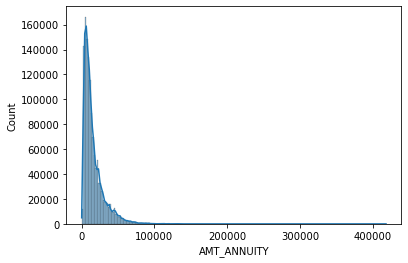

In [79]:
sns.histplot(previous['AMT_ANNUITY'],kde=True,bins=200)
plt.show()

In [80]:
#Insight: imputing median for missing values
previous["AMT_ANNUITY"].fillna(previous["AMT_ANNUITY"].median(),inplace=True)

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Count'>

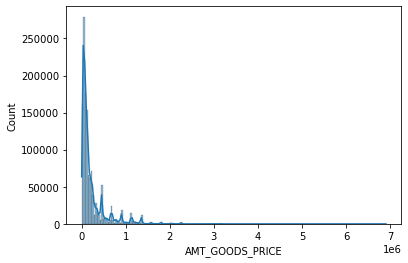

In [81]:
sns.histplot(previous["AMT_GOODS_PRICE"],kde=True,bins=200)

In [82]:
#Insight: There are lot of peaks in the distribution and if we plot mode and actual distribution are similar so imputing with mode
previous["AMT_GOODS_PRICE"].fillna(previous["AMT_GOODS_PRICE"].mode()[0],inplace=True)

#### variable CNT_PAYMENT 

In [83]:
#imputing CNT_PAYMENT with 0
previous.loc[previous['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [84]:
previous["CNT_PAYMENT"].fillna(0,inplace=True)

### FINDING OUTLIERS

In [85]:
#IF MEAN AND MEDIAN ARE NOT SAME THEN WE CAN SAY THAT THERE IS OUTLIER
previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.490651e+04,1.752339e+05,1.961140e+05,1.856429e+05,8.806797e+02,3.139511e+02,1.247621e+01,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017,0.332570
std,5.325980e+05,1.028148e+05,1.317751e+04,2.927798e+05,3.185746e+05,2.871413e+05,7.790997e+02,7.127443e+03,1.447588e+01,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,1.461857e+06,1.893290e+05,7.547096e+03,1.872000e+04,2.416050e+04,4.500000e+04,2.800000e+02,-1.000000e+00,0.000000e+00,365243.000000,475.000000,257.000000,455.000000,447.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,5.810000e+02,3.000000e+00,1.000000e+01,365243.000000,921.000000,741.000000,1155.000000,1171.000000,0.000000
75%,2.384280e+06,3.675140e+05,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,1.300000e+03,8.200000e+01,1.600000e+01,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.922000e+03,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


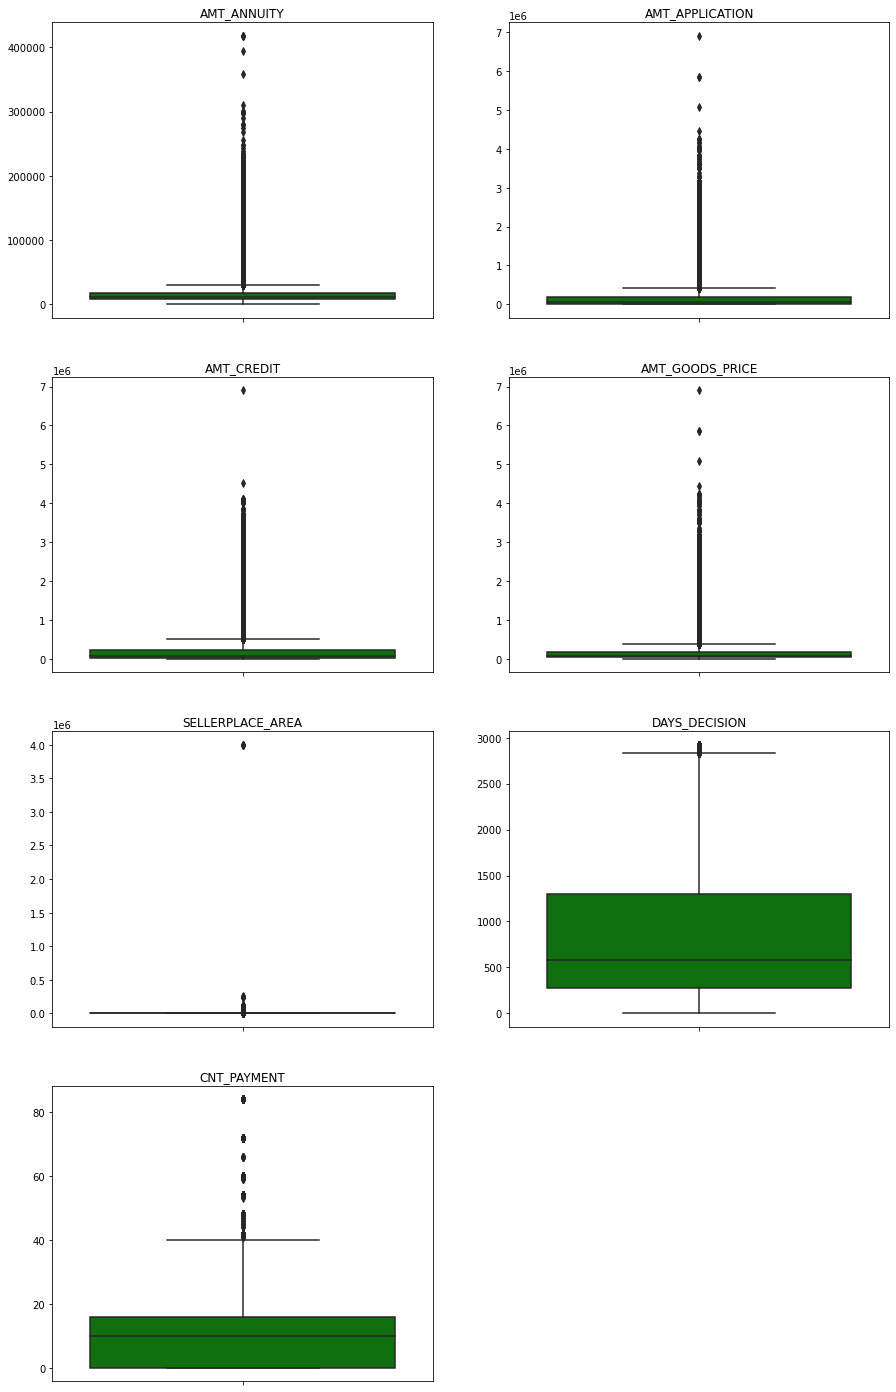

In [86]:
import itertools
previous_outlier_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(previous_outlier_col, range(len(previous_outlier_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = previous[i], orient = "h", color = "green")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

In [87]:
#Converting required categoical columns from Object to categorical 

previous_catgorical_col = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']

for col in previous_catgorical_col:
    previous[col] =pd.Categorical(previous[col])

# DATA IMBALANCE


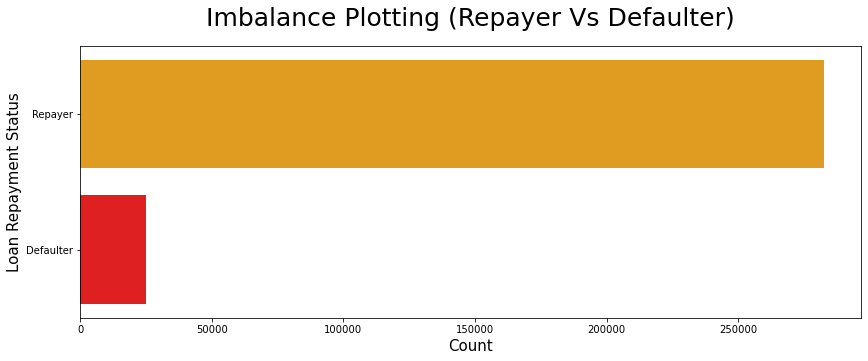

In [88]:
plt.figure(figsize= [14,5])
sns.barplot(y=["Repayer","Defaulter"], x = application["TARGET"].value_counts(), palette = ["orange","r"],orient="h")
plt.ylabel("Loan Repayment Status",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":15})
plt.title("Imbalance Plotting (Repayer Vs Defaulter)", fontdict = {"fontsize":25}, pad = 20)
plt.show()

In [89]:
repayer = round((application["TARGET"].value_counts()[0]/len(application)* 100),2)
print("Repayer Percentage is {}%".format(repayer))
defaluter = round((application["TARGET"].value_counts()[1]/len(application)* 100),2)
print("Defaulter Percentage is {}%".format(defaluter))

Repayer Percentage is 91.93%
Defaulter Percentage is 8.07%


## UNIVARIATE ANALYSIS

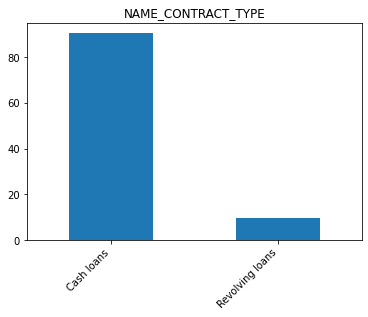

In [90]:
#segmented-univariate analysis
(application.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=45, ha='right')
plt.title("NAME_CONTRACT_TYPE")
plt.show()




#### Revolving loans are of small percentage 9-10% 
#### 8-9% of cash loans applicants and 5-6% revolving loan applicants are defaulters


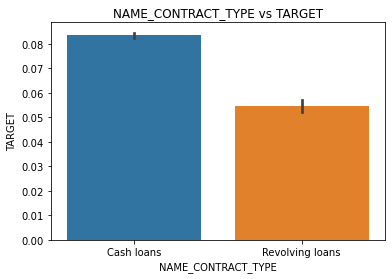

In [91]:
plt.title("NAME_CONTRACT_TYPE vs TARGET")
sns.barplot(data= application, x='NAME_CONTRACT_TYPE',y = 'TARGET' )
plt.show()

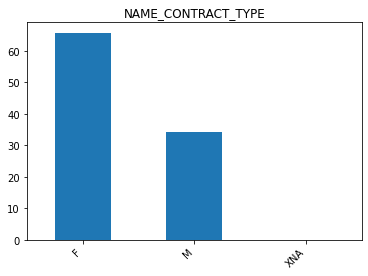

In [92]:
(application.CODE_GENDER.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=45, ha='right')
plt.title("NAME_CONTRACT_TYPE")
plt.show()


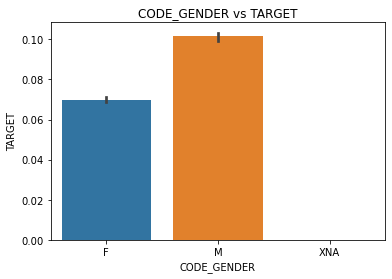

In [93]:
plt.title("CODE_GENDER vs TARGET")
sns.barplot(data= application, x='CODE_GENDER',y = 'TARGET' )
plt.show()

#### INSIGHT: female clients are more than male clients, almost double
#### male defaulters are more than female defaulters

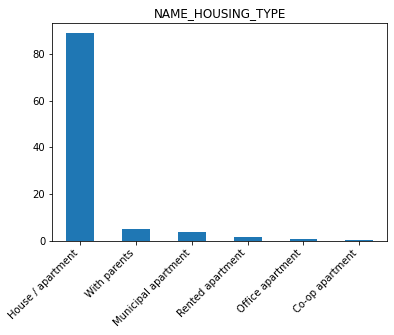

In [94]:
(application.NAME_HOUSING_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=45, ha='right')
plt.title("NAME_HOUSING_TYPE")
plt.show()


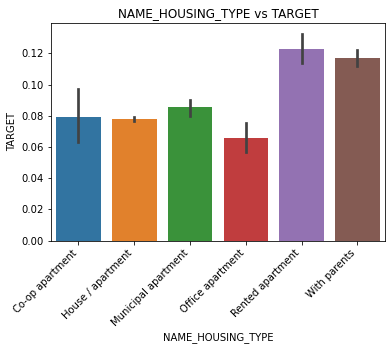

In [95]:
plt.title("NAME_HOUSING_TYPE vs TARGET")
sns.barplot(data= application, x='NAME_HOUSING_TYPE',y = 'TARGET' )
plt.xticks(rotation=45, ha='right')
plt.show()

#### Inference: People in rented apartments and living with parents have high probabitlity of defaulters
#### People living in house/apartments havehigh default rate

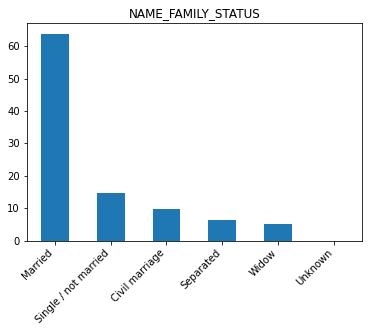

In [96]:
(application.NAME_FAMILY_STATUS.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=45, ha='right')
plt.title("NAME_FAMILY_STATUS")
plt.show()

#### Inference: most of the people taking loan are married followed by single/not married 


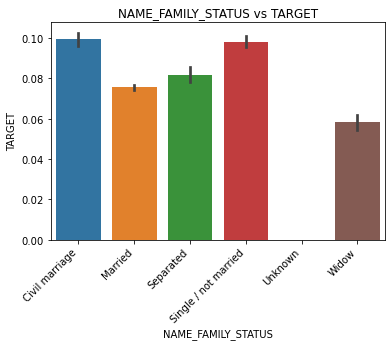

In [97]:
plt.title("NAME_FAMILY_STATUS vs TARGET")
sns.barplot(data= application, x='NAME_FAMILY_STATUS',y = 'TARGET' )
plt.xticks(rotation=45, ha='right')
plt.show()

#### Inference the percentage of defaulters are more in civil marriage(~10%)

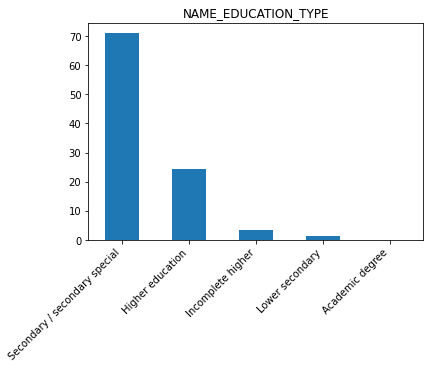

In [98]:
(application.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.xticks(rotation=45, ha='right')
plt.title("NAME_EDUCATION_TYPE")
plt.show()

#### inference: many clients have secondary/ secondary special education

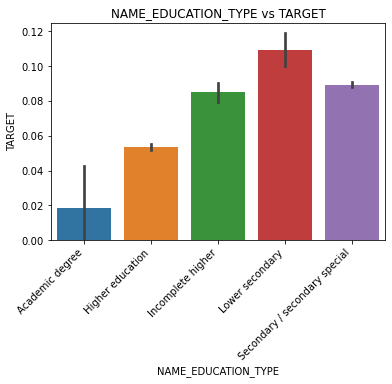

In [99]:
plt.title("NAME_EDUCATION_TYPE vs TARGET")
sns.barplot(data= application, x='NAME_EDUCATION_TYPE',y = 'TARGET' )
plt.xticks(rotation=45, ha='right')
plt.show()

#### Inference: Lower secondary category have highest rate of defaulting around 11%

In [100]:
# Creating a function to find if the column is categorical or numerical 
def data_type_column(dataset,col):
    if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
        return "numerical"
    if dataset[col].dtype == "category":
        return "categorical"

    
# Creating a function "univariate" to perform analysis one single variable with respect to target variable

def univariategraph(dataset,col,target_col,ylog=False,x_label_angle=False,h_layout=True):
    if data_type_column(dataset,col) == "numerical":
        sns.distplot(dataset[col],hist=False)
        
        
    elif data_type_column(dataset,col) == "categorical":
        val_count = dataset[col].value_counts()
        df1 = pd.DataFrame({col: val_count.index,'count': val_count.values})
        
        
        target1percentage = dataset[[col, target_col]].groupby([col],as_index=False).mean()
        target1percentage[target_col] = target1percentage[target_col]*100
        target1percentage.sort_values(by=target_col,inplace = True)
        
        
# If the plot is not readable, use the log scale

        if(h_layout):
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
        else:
            fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25,35))
              
        
# 1. Subplot 1: Count plot of the column
        
        s = sns.countplot(ax=ax1, x=col, data=dataset, hue=target_col)
        ax1.set_title(col, fontsize = 20)
        ax1.legend(['Repayers','Defaulters'])
        ax1.set_xlabel(col,fontdict={'fontsize' : 16, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
        
# 2. Subplot 2: Percentage of defaulters within the column
        
        s = sns.barplot(ax=ax2, x = col, y=target_col, data=target1percentage)
        ax2.set_title("Defaulters % in "+col, fontsize = 20)    
        ax2.set_xlabel(col,fontdict={'fontsize' : 16, 'fontweight' : 3})
        ax2.set_ylabel(target_col,fontdict={'fontsize' : 16, 'fontweight' : 3})
        plt.style.use('dark_background')
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
            
            
# If the plot is not readable, use the log scale
                
        if ylog:
            ax1.set_yscale('log')
            ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 17, 'fontweight' : 3})
        else:
            ax1.set_ylabel("Count",fontdict={'fontsize' : 17, 'fontweight' : 3})

        plt.style.use('dark_background')
        plt.show()

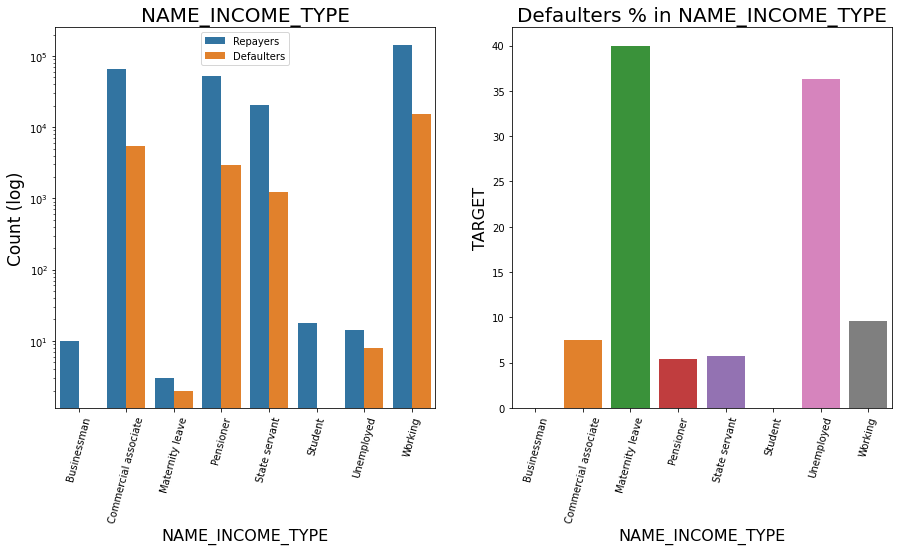

In [101]:
univariategraph(application,"NAME_INCOME_TYPE","TARGET",True,True,True)

#### Safest catogories to provide loan: student and businessman though are less in numbers have no default record

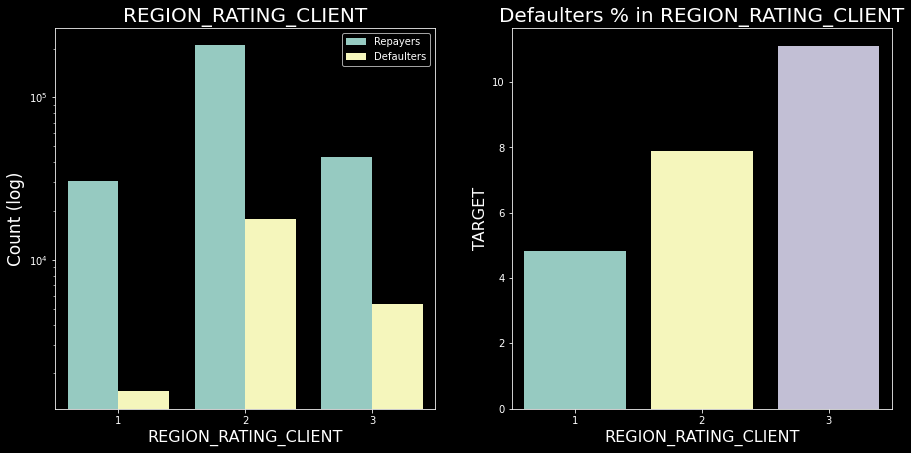

In [102]:
univariategraph(application,"REGION_RATING_CLIENT","TARGET",True,False,True)

#### Lowest probability of defaulting: applicant living in REGION_RATING_1

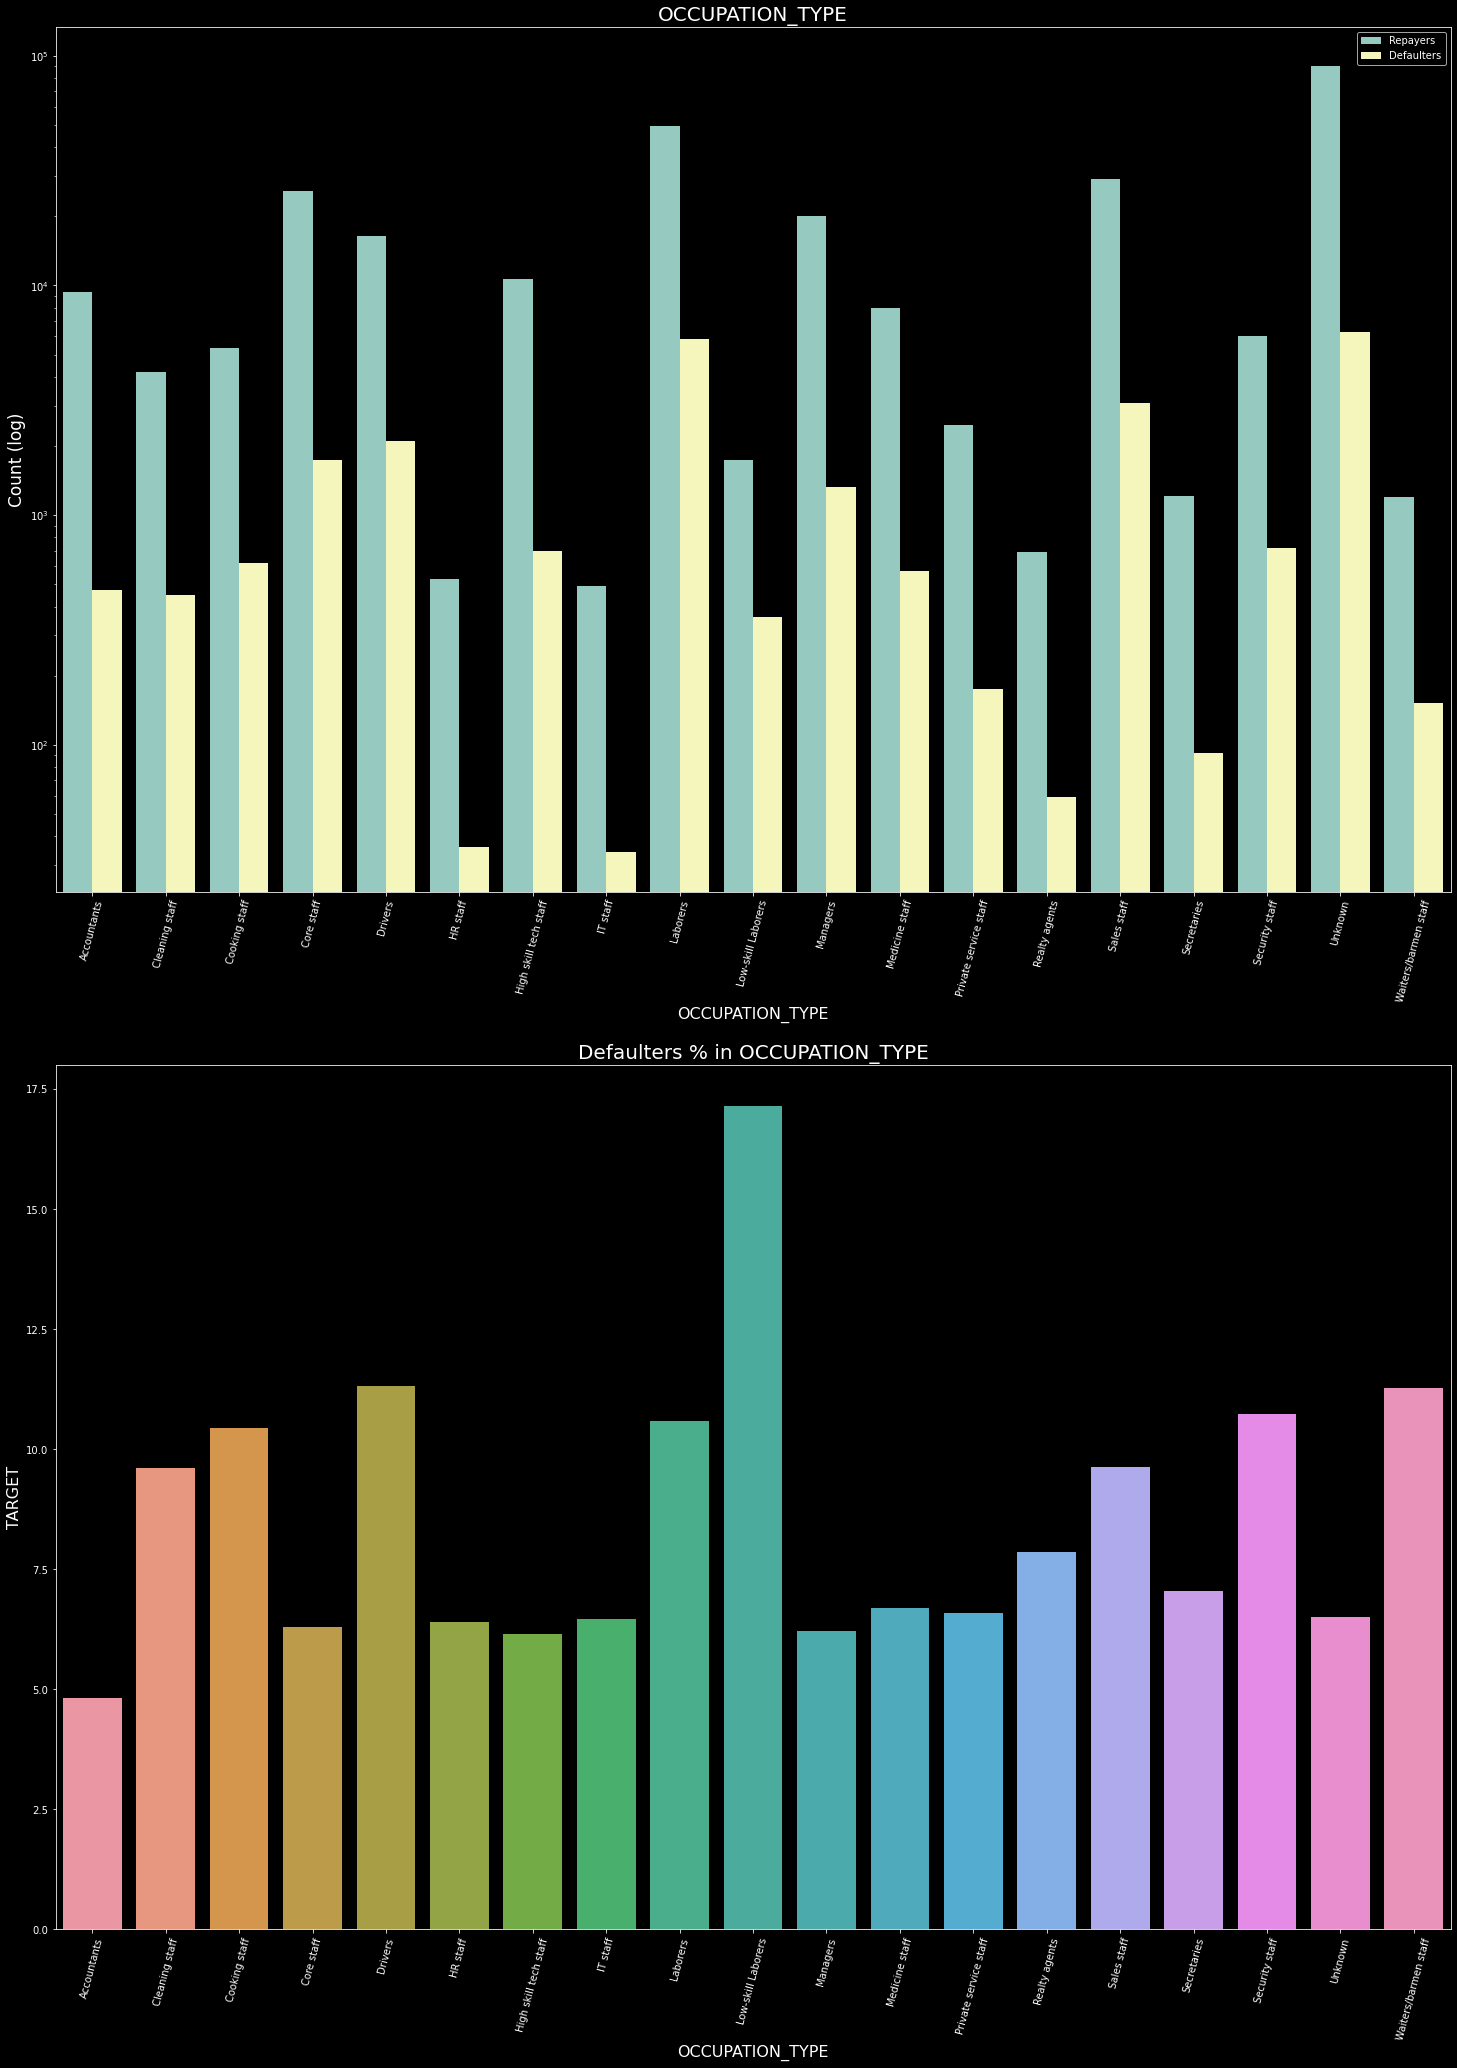

In [103]:
univariategraph(application,"OCCUPATION_TYPE","TARGET",True,True,False)

#### Majority loans taken by: Laborers, Sales staff
#### High Defaulters: Low-skill laborers

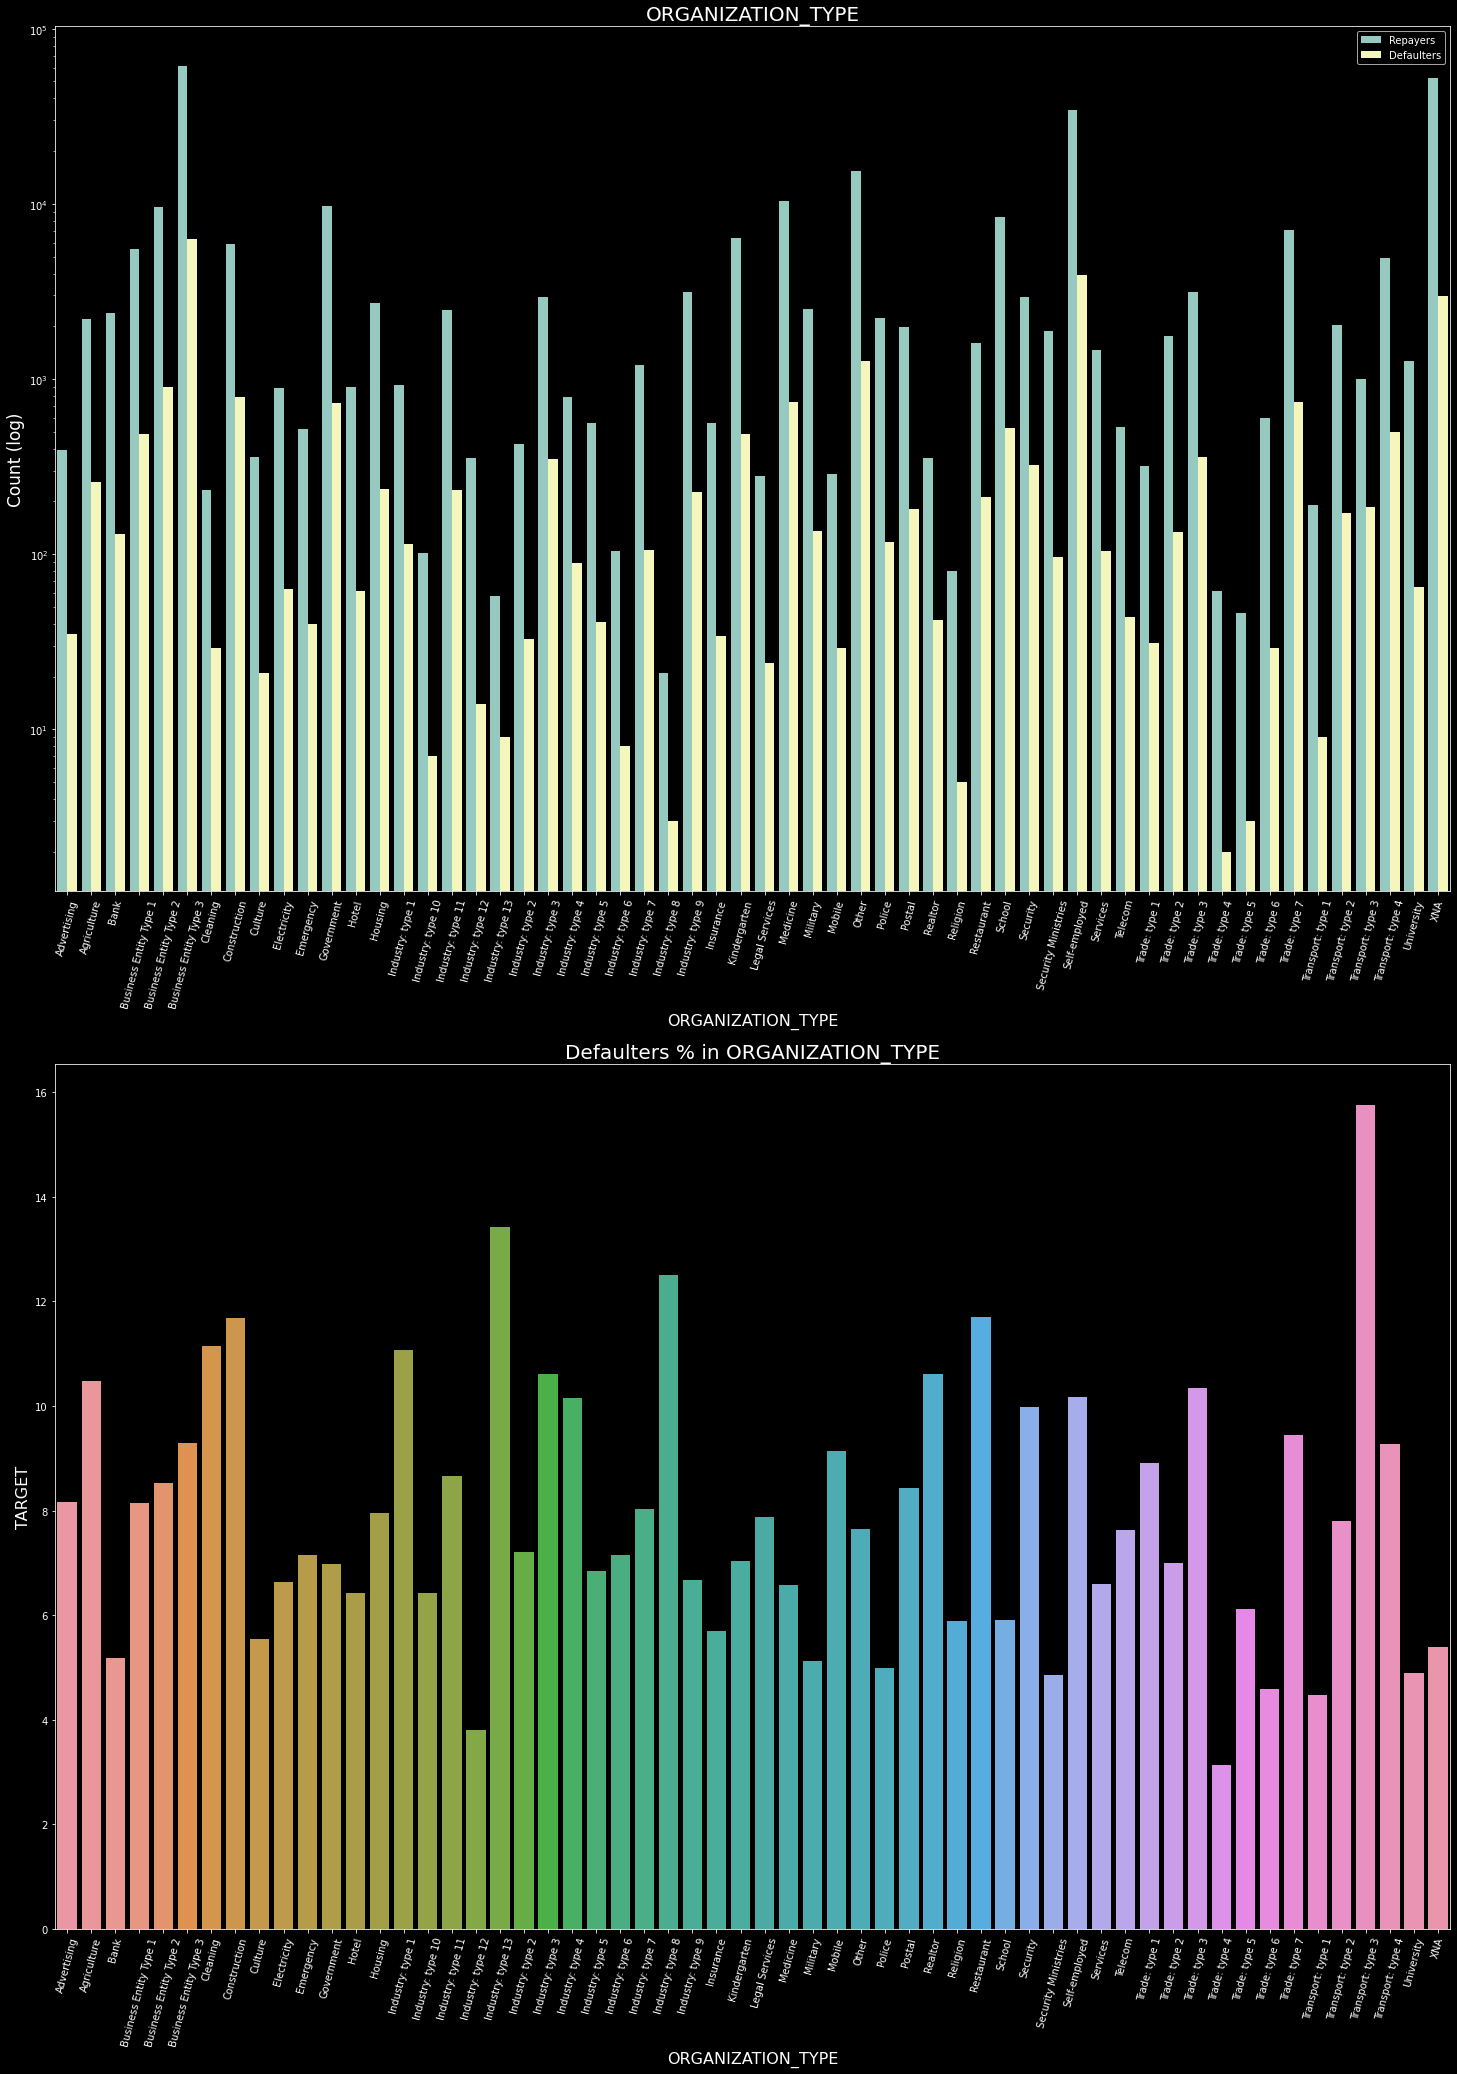

In [104]:
univariategraph(application,"ORGANIZATION_TYPE","TARGET",True,True,False)

#### High percent of defaulters: Transport-type3, Industry-type 13, Industry: type 8, Restaurant 
#### safe categary: Trade type 4,5 and Industry type 8

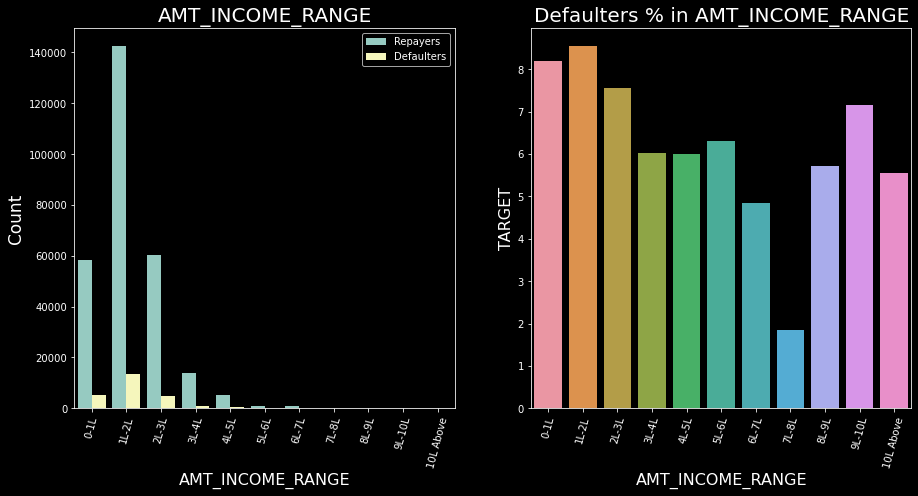

In [105]:
univariategraph(application,"AMT_INCOME_RANGE","TARGET",False,True,True)

#### Majority applicants: income 1-2L
#### High prbability of defaulters: income with less than 3lakhs
#### Safe category: Income 7-8lakhs

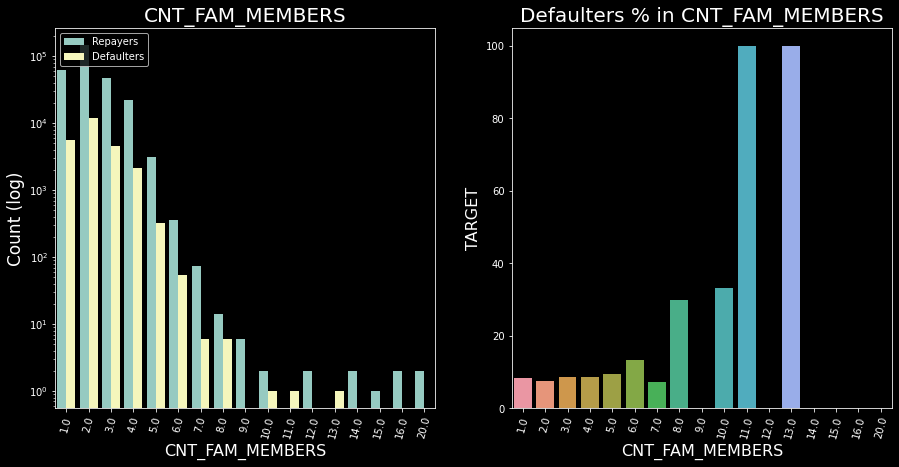

In [106]:
univariategraph(application,"CNT_FAM_MEMBERS","TARGET",True,True,True)

##### more members higher risk of defaulting

# BIVARIATE ANALYSIS


In [107]:
def bivariateGraphNumerical(x,y,df,hue,kind,labels):
    plt.figure(figsize=[15,15])
    sns.relplot(x=x, y=y, data=df, hue=hue,kind=kind,legend = False)
    plt.legend(labels=labels)
    sns.set_theme(style="ticks", color_codes=True)

    plt.xticks(rotation=45, ha='right')
    plt.style.use('dark_background')
    plt.show()

<Figure size 1080x1080 with 0 Axes>

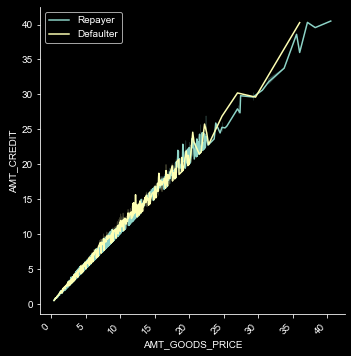

In [108]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariateGraphNumerical('AMT_GOODS_PRICE','AMT_CREDIT',application,"TARGET", "line",['Repayer','Defaulter'])

#### When the credit amount goes beyond 30 Lakhs, there is an increase in defaulters.

In [109]:
def bivariate_categorical(x,y,df,hue,figsize,labels):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df, hue=hue)     
    sns.set_theme(style="ticks", color_codes=True)
   
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontsize = 15)    
    plt.ylabel(y,fontsize = 15)    
    plt.title(col,fontsize = 20) 
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels = labels )
    plt.show()

#### It can be seen that Businessman income has the highest and the low default seem to indicate that the income of a Businessman could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs 


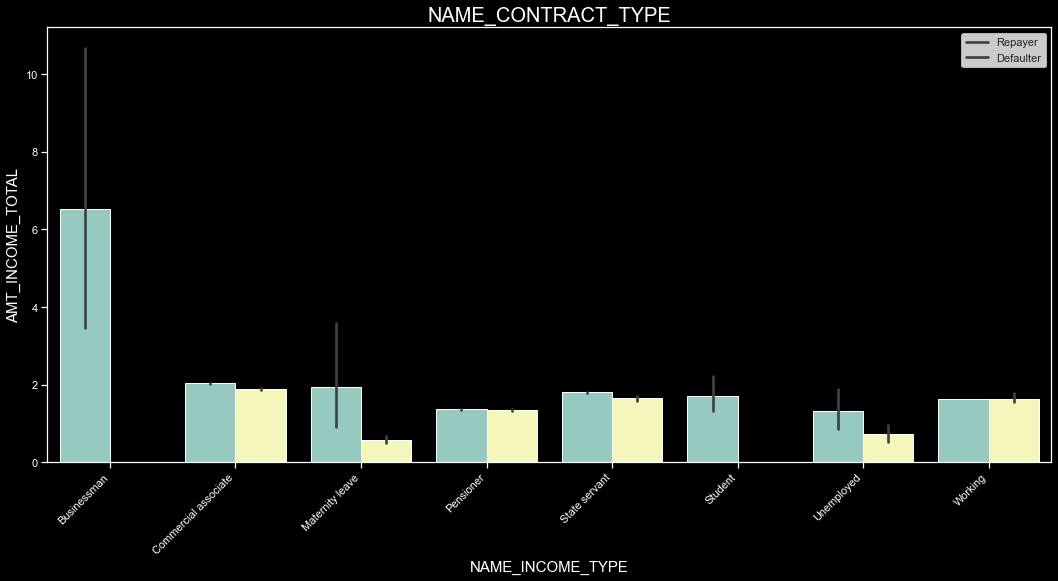

In [110]:
# Income type vs Income Amount Range on a Seaborn Barplot
bivariate_categorical("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",application,"TARGET",(18,8),['Repayer','Defaulter'])
sns.set_theme(style="ticks", color_codes=True)

In [111]:
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
# Repayers dataframe
Repayer_dataframe = application.loc[application['TARGET']==0, cols_for_correlation]

# Defaulters dataframe
Defaulter_dataframe = application.loc[application['TARGET']==1, cols_for_correlation]

In [112]:
len(cols_for_correlation)

41

In [113]:
corr_repayer = Repayer_dataframe.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
64,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
65,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
43,AMT_ANNUITY,AMT_CREDIT,0.771309
131,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
42,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
63,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
21,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
152,DAYS_REGISTRATION,DAYS_BIRTH,0.333151
174,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.276663
173,DAYS_ID_PUBLISH,DAYS_BIRTH,0.271314


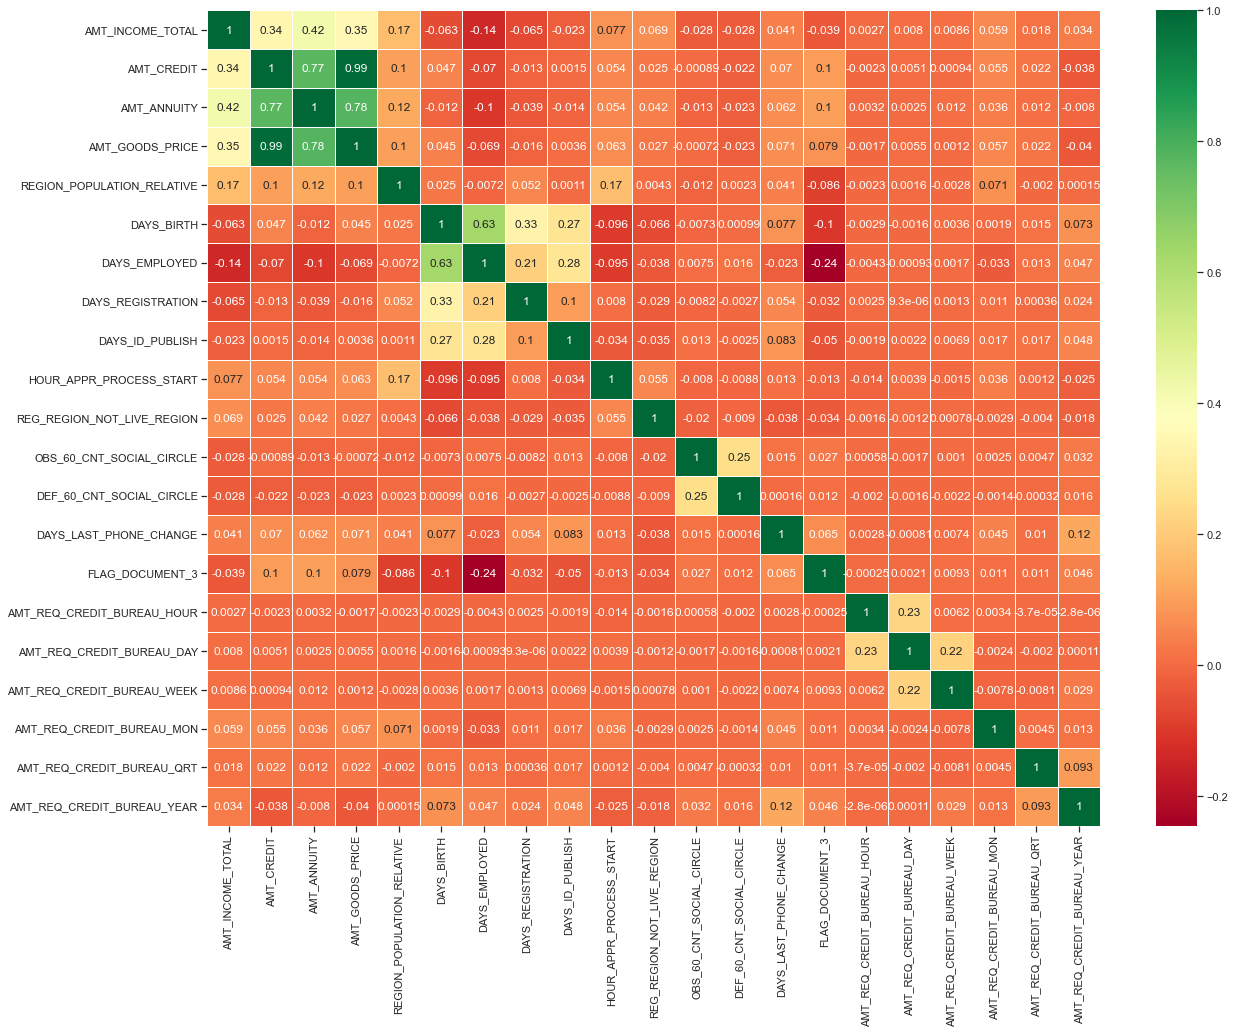

In [114]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Repayer_dataframe.corr(), cmap="RdYlGn",annot=True,linewidth =1)

## Inference
### 1.Credit amount if highly correlated with - Goods Price Amount, Loan Annuity, Total Income
### 2.We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).

In [115]:
corr_Defaulter = Defaulter_dataframe.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
64,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
65,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
43,AMT_ANNUITY,AMT_CREDIT,0.752195
131,DAYS_EMPLOYED,DAYS_BIRTH,0.582185
152,DAYS_REGISTRATION,DAYS_BIRTH,0.289114
300,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.272169
263,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.264159
173,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863
351,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,0.247511
174,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090


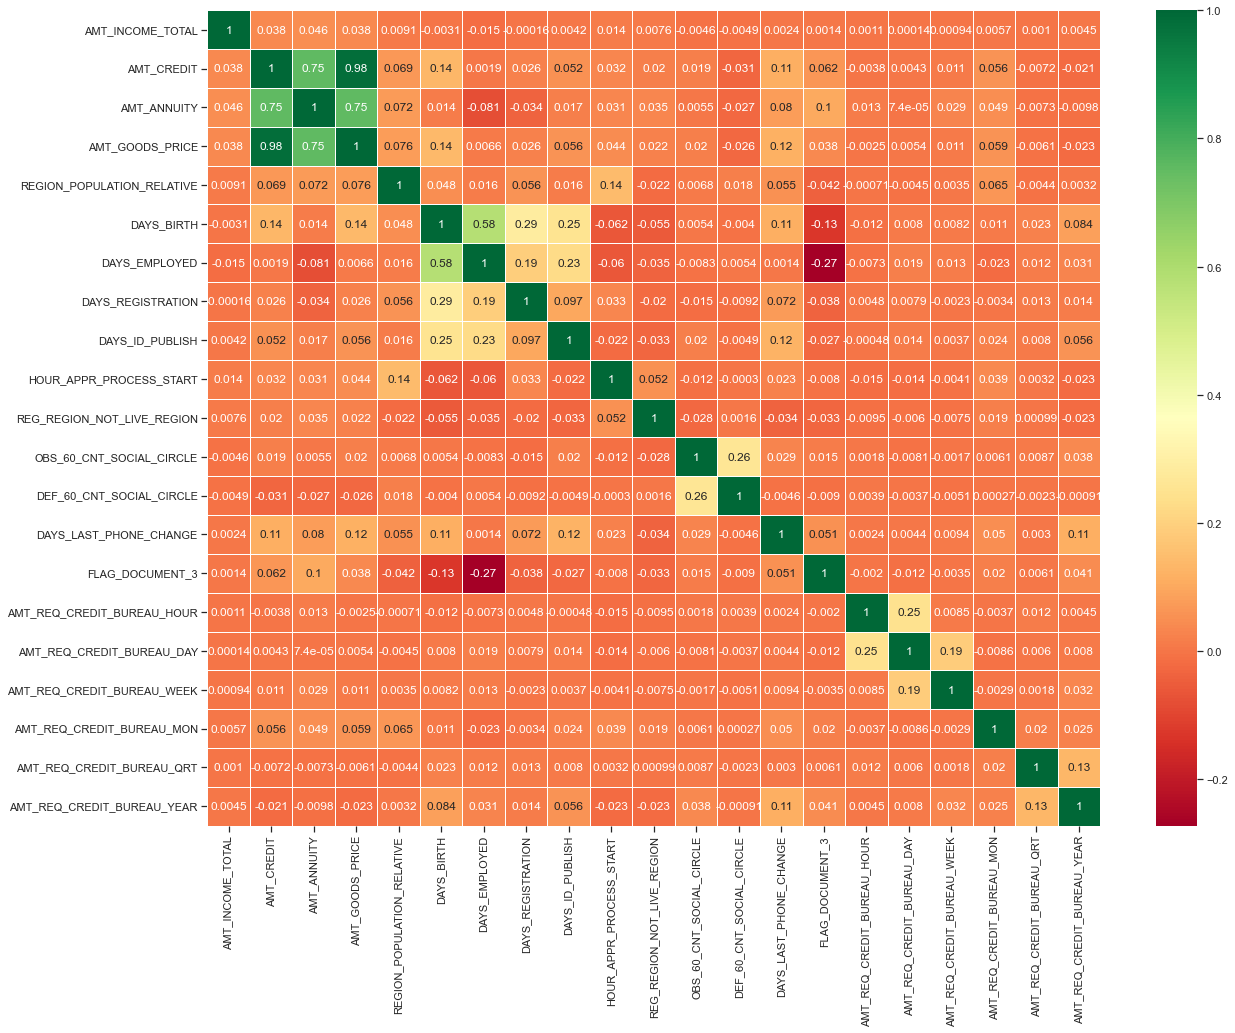

In [116]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Defaulter_dataframe.corr(), cmap="RdYlGn",annot=True,linewidth =1)

#### Loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)

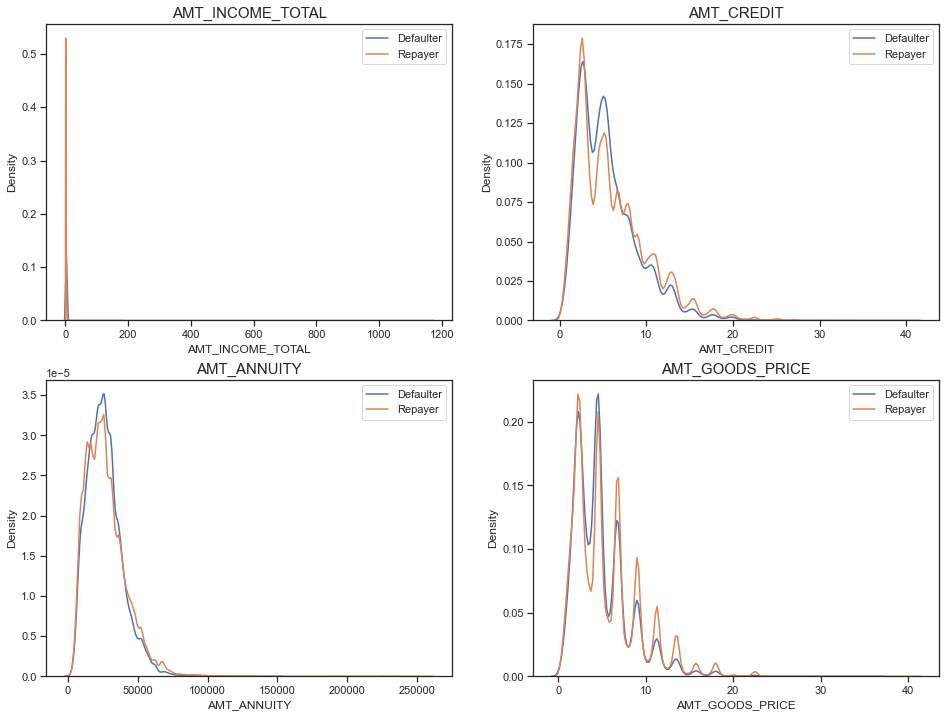

In [117]:
#numericl univariate analysis
amount = application[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_dataframe[i[1]], hist=False,label ="Defaulter")
    sns.distplot(Repayer_dataframe[i[1]], hist=False, label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5})
    plt.legend()


plt.show()

#### credit amout of load is mostly less than 10 lakhs
#### Most people pay annuity below 50K for the credit loan


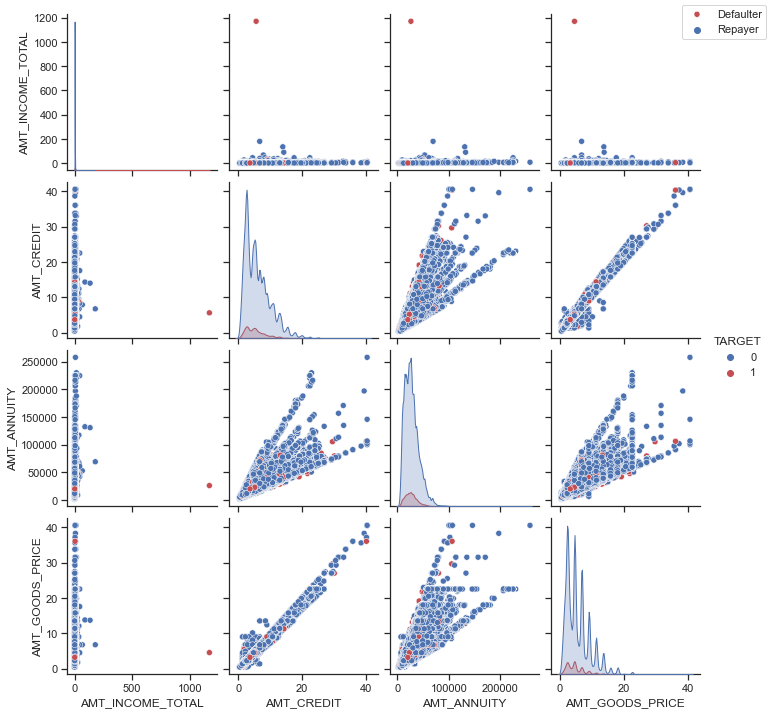

In [118]:
amount = application[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]

ax= sns.pairplot(amount,hue="TARGET",palette=["b","r"])
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()

#### When Annuity Amount > 15K and Good Price Amount > 20 Lakhs, there is a lesser chance of defaulters

# CONCLUSION


## Variables which are strong indicators of default. 
#### 1.CODE_GENDER: Men have relatively higher default rate
#### 2.NAME_FAMILY_STATUS: people who have civil marriage have relatively high default rates
#### 3. NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education
#### 4. OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as their default rate is huge.
#### 5. AMT_GOODS_PRICE: When the credit amount goes beyond 3lakhs, there is an increase in defaulters.
#### 6. REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.
#### 7. ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting

## safe costumers

#### 1.NAME_INCOME_TYPE: student and businessmen have no defaults
#### 2.REGION_RATING_1 Is safer
#### 3.DAYS_EMPLOYED: clients with 40+ year expereince
#### 4.Organization_type:  Clients with Trade Type 4 and 5 and Industry type 8
#### 5.AMT_INCOME_TOTAL:Applicant with Income more than 700,000 


## Factors that Loan can be given on Condition of High Interest rate to mitigate any default risk leading to business loss:

#### 1.NAME_HOUSING_TYPE:  people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.
#### 2.AMT_CREDIT: People who get loan for 3-6 Lakhs tend to default more than others 
#### 3.AMT_INCOME: Since 90% of the applications have Income total less than 3Lakhs and they have high probability of defaulting, 
#### 4.CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 to 8 children has a very high default rate 
#### 5.NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate. 
